In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv(r"C:\Users\aarya\Desktop\Specialization AIML\Data sets\HR_comma_sep.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
df.drop(['Department'], axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [16]:
salary = pd.get_dummies(df.salary, drop_first = True)
salary = salary.astype(int)

In [21]:
df = pd.concat([df, salary], axis = 1)

In [22]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,low,1,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,low,1,0
4,0.37,0.52,2,159,3,0,1,0,low,1,0


In [24]:
df.drop(['salary'], axis = 1, inplace = True)

<Axes: >

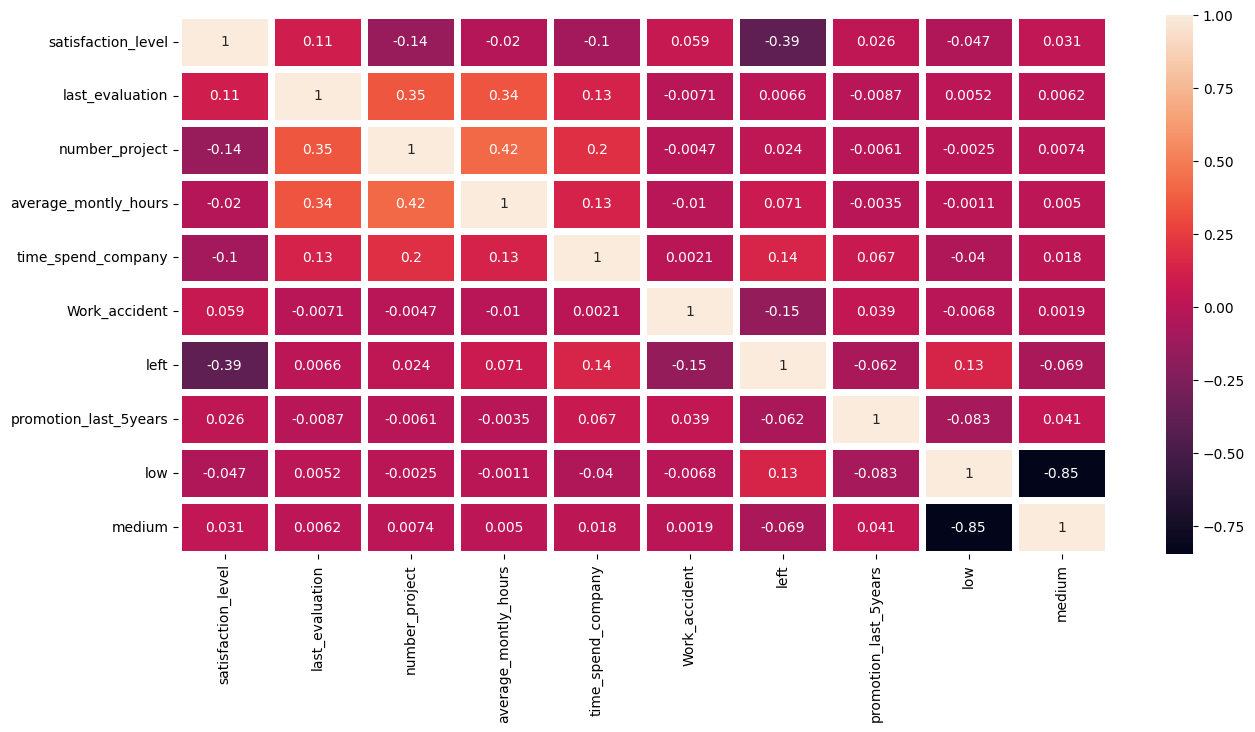

In [27]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), linewidth = 5, annot = True)

In [26]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.082832,0.040985
low,-0.047415,0.005221,-0.002504,-0.001050,-0.040110,-0.006813,0.134722,-0.082832,1.000000,-0.847144
medium,0.031367,0.006191,0.007377,0.005007,0.018299,0.001856,-0.068833,0.040985,-0.847144,1.000000


In [28]:
from sklearn.model_selection import train_test_split

In [34]:
x = df[['time_spend_company', 'low', 'number_project']]
y = df['left']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [44]:
x_test

,time_spend_company,low,number_project
6723,2,0,5
6473,2,1,3
4679,2,1,3
862,3,1,2
7286,2,1,5
...,...,...,...
2655,2,1,5
4606,2,1,3
10904,2,0,4
14862,4,0,6


In [45]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
model.predict([[5, 0, 3]])

c:\Users\aarya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [48]:
model.score(x_test, y_test)

0.762

In [54]:
model.predict_proba(x_test) #2D matrix of probabilities of x_test with 0 and 1

array([[0.86780155, 0.13219845],
       [0.7695018 , 0.2304982 ],
       [0.7695018 , 0.2304982 ],
       ...,
       [0.8679338 , 0.1320662 ],
       [0.80607493, 0.19392507],
       [0.72663173, 0.27336827]])

In [53]:
model.predict_log_proba(x_test)

array([[-0.14179222, -2.02345105],
       [-0.26201198, -1.46751224],
       [-0.26201198, -1.46751224],
       ...,
       [-0.14163983, -2.02445197],
       [-0.21557857, -1.64028344],
       [-0.31933549, -1.29693542]])